# Линейная классификация




Задача классификации заключается в том, чтобы отнести каждый из объектов выборки к какому-либо классу из данного набора. Более формально, нам нужно построить классификатор - функцию $a \colon X \rightarrow Y$, которая поставит в соответствие каждому объекту $x$ из пространства объектов $X$ какой-либо класс $y$ из пространства ответов $Y$, где в случае $Y$ - это какое-то конечное множество. То есть, если мы рассмотрим какой-то объект выборки $x$, мы должны получить для него ответ $y = a(x)$.

Задачи классификации можно поделить на два типа: бинарная классификация и многоклассовая классификация. В задаче бинарной классификации у нас всего лишь два класса, и множество $Y$ содержит всего два элемента. В задаче же многоклассовой классификации классов больше, чем два.

Примеры задач бинарной классификации:

- пассажиры с Титаника: выжил ли пассажир? (множество $X$ - пассажиры, множество $Y$ - выжил/нет)
- отдаст ли клиент кредит банку? (множество $X$ - клиенты, множество $Y$ - отдаст/нет)
- является ли отзыв к товару положительным? (множество $X$ - отзывы, множество $Y$ - положительный/отрицательный)

Примеры задач многоклассовой классификации:

- какое заболевание у пациента? (множество $X$ - пациенты, множество $Y$ - возможные заболевания)
- автоматическое распознавание символов в рукописном тексте (множество $X$ - выделенные в тексте символы, множество $Y$ - словарь символов)
- к какому жанру относится данный художественный текст? (множество $X$ - тексты, множество $Y$ - жанры)

Для того, чтобы познакомиться с задачей классификации на практике, сгенерируем искусственный датасет, состоящий из 500 объектов. Признаков будет два. Целевая переменная принимает два значения: $-1$ и $1$.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [ ]:
np.random.seed(13)

n = 500
X = np.random.normal(size=(n, 2))
X[:250, :] += 0.75
X[250:, :] -= 1
y = np.array([1] * 250 + [-1] * 250)

Визуализируем данные. Построим диаграмму рассеяния по данным признакам, и обозначим объекты разных классов разными цветами.

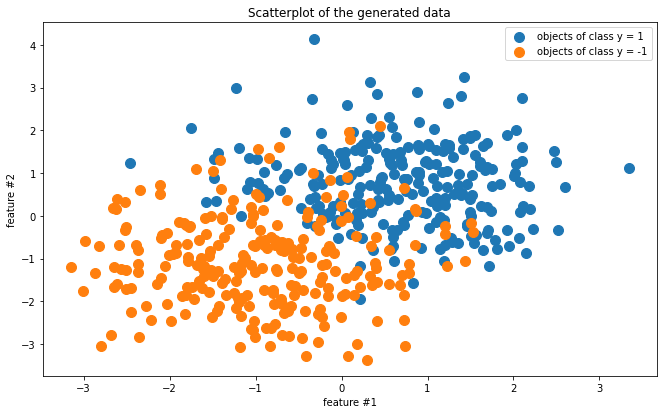

In [ ]:
plt.figure(figsize=(11, 6.5))
plt.scatter(X[y == 1, 0], X[y == 1, 1], cmap='winter', s=100, label='objects of class y = 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], cmap='winter', s=100, label='objects of class y = -1')
plt.title('Scatterplot of the generated data')
plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.legend()
plt.show()

Перед Вами стоит задача - разделить объекты на два класса. На картинке видно, что представители этих классов более-менее отделены друг от друга, и почти не перемешиваются. Но как же решить задачу с помощью машинного обучения? Напомним, что задача заключается в построении алгоритма (функции $a(x)$), который позволит классифицировать **любой** объект из пространства возможных объектов.

Есть различные типы моделей машинного обучения, которые позволяют решить данную задачу. Одним из типов моделей являются линейные классификаторы. Их особенность заключается в том, что решение о принадлежности объекта к какому-либо классу принимается на основе **линейной комбинации** его характеристик (значений признаков). Предположим, что в датасете $d$ признаков, то есть каждый объект $x$ имеет $d$ характеристик - $x_1, x_2, \ldots, x_d$. Тогда ответ линейного классификатора будет получаться по следующей формуле:

$$
y = f\left(\sum\limits_{j = 1}^d w_jx_j\right), \qquad\qquad (1)
$$

где $f$ - какая-то функция, подходящая по смыслу нашей задаче (выдающая конечное множество значений - классов), а $w_j$ - веса классификатора. Понятно, что так как мы можем выбрать любую разумную $f$, мы можем "сдвинуть" параметр функции $f$ на некоторое число $w_0$. Тогда можно переписать формулу $(1)$ следующим образом, добавив еще один вес - $w_0$:

$$
y = f\left(w_0 + \sum\limits_{j = 1}^d w_jx_j\right) \qquad\qquad (2)
$$

Какую же функцию $f$ мы можем выбрать? В задаче бинарной классификации $f$ может быть функцией, которая выдает разные ответы в зависимости от того, какой знак (плюс или минус) имеет рассматриваемое значение:

$$
y = \operatorname{sign}\left(w_0 + \sum\limits_{j = 1}^d w_jx_j\right) = \begin{cases} 1, & w_0 + \sum\limits_{j = 1}^d w_jx_j \geq 0 \\ -1, & w_0 + \sum\limits_{j = 1}^d w_jx_j < 0 \end{cases} \qquad\qquad (3)
$$

Кстати, если в качестве $f$ выбрать сигмоидную функцию, то получится логистическая регрессия, где на выходе получается вероятность положительного класса:

$$
y = \sigma\left(w_0 + \sum\limits_{j = 1}^d w_jx_j\right) = \frac{1}{1 + \exp\left(-w_0 - \sum\limits_{j = 1}^d w_jx_j\right)}
$$

Давайте более детально разберем, что мы получили. Приравняем рассматриваемое "сдвинутое" значение линейной комбинации к нулю:

$$
w_0 + \sum\limits_{j = 1}^d w_jx_j = 0 \qquad\qquad (4)
$$

Это очень похоже на уравнение прямой на плоскости, в котором также есть переменные ($x_1$ и $x_2$), веса ($a$ и $b$) и свободный коэффициент ($c$):

$$
ax_1 + bx_2 + c = 0
$$

Формула $(4)$ - это уравнение **гиперплоскости**, что является обобщением прямой на плоскости на пространства любых размерностей. Если говорить строго, прямая является подпространством размерности $1$ пространства размерности $2$ (плоскости), то есть ее размерность на $1$ меньше, чем у исходного пространства. А гиперплоскость - подпространство размерности $d - 1$ пространства размерности $d$.

Таким образом, уравнение $(4)$ соответствует гиперплоскости размерности $d - 1$ в пространстве размерности $d$. В таком случае уравнение $(3)$ показывает, **по какую сторону от гиперплоскости лежит объект**. Если объект лежит по одну сторону от гиперплоскости, то он относится к положительному классу, если по другую - к отрицательному. Получается, что данный классификатор строит **разделяющую гиперплоскость**, разделяющую пространство на две области - один класс и другой.

Для наглядности разберем случай $d = 2$ на примере сгенерированного ранее датасета. Уравнение разделяющей гиперплоскости (прямой) будет выглядеть так:

$$
w_0 + w_1x_1 + w_2x_2 = 0
$$

Зададим веса $w_0 = w_1 = w_2 = 1$ и посмотрим на прямую, которая получится в результате.

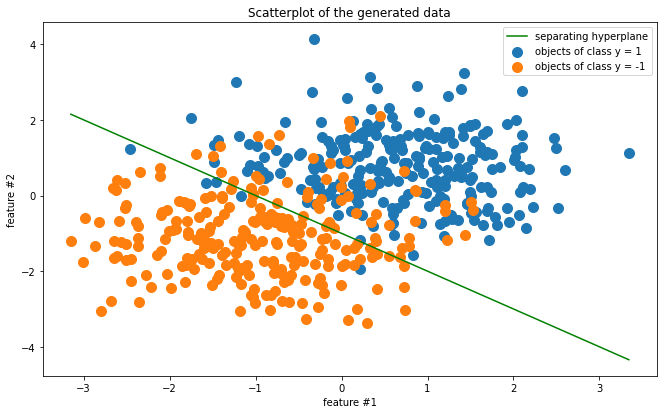

In [ ]:
w0 = 1
w1 = 1
w2 = 1
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
x2 = (- w1 * x1 - w0) / w2

plt.figure(figsize=(11, 6.5))
plt.scatter(X[y == 1, 0], X[y == 1, 1], cmap='winter', s=100, label='objects of class y = 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], cmap='winter', s=100, label='objects of class y = -1')
plt.plot(x1, x2, color='green', label='separating hyperplane')
plt.title('Scatterplot of the generated data')
plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.legend()
plt.show()

Видно, что прямая неплохо разделяет классы. Однако мы сделали только первое предположение о весах гиперплоскости, и оптимальное качество разбиения можно попробовать получить с помощью градиентного спуска. Для этого, как было сделано в лекции, можно выбрать логистическую функцию потерь:

$$
\tilde{Q}(w, X) = \frac{1}{\ell}\sum\limits_{i=1}^\ell\log\left(1 + \exp(-y_i\langle w, x_i\rangle)\right) \rightarrow \min_w
$$

Здесь $\ell$ - количество объектов в данных (в нашем случае $\ell = 500$), $w$ - вектор весов, $x_i$ - признаковое описание $i$-ого объекта. Для удобства мы предполагаем, что в данных есть единичный признак (который соответствует весу $w_0$), поэтому левая часть уравнения $(4)$ превращается в скалярное произведение:

$$
\langle w, x\rangle = 0
$$

Градиент выбранной функции потерь:

$$
\nabla_w\tilde{Q}(w, X) = -\frac{1}{\ell}\sum\limits_{i=1}^\ell\frac{y_ix_i}{1 + \exp(y_i\langle w, x_i\rangle)}
$$

Формула градиентного спуска:

$$
w^{(t)} = w^{(t - 1)} - \eta\nabla_w\tilde{Q}(w, X)
$$

Реализуем формулы функции потерь и ее градиента, а также добавим в данные единичный признак.

In [ ]:
def log_loss(w, X, y):
    Q = np.log(1 + np.exp(-y * (X @ w))).mean()
    return Q

def log_loss_grad(w, X, y):
    Q_grad = - ((X * y.reshape(-1, 1)) / (1 + np.exp(y * (X @ w))).reshape(-1, 1)).mean(axis=0)
    return Q_grad

w_init = np.array([1.0, 1.0, 1.0])
X_new = np.c_[np.ones(n), X]
print(X_new)

[[ 1.          0.03760934  1.50376638]
 [ 1.          0.70549692  1.20181234]
 [ 1.          2.09510171  1.28233789]
 ...
 [ 1.         -1.03507109 -0.67849181]
 [ 1.         -1.1739724  -2.33492537]
 [ 1.         -2.51019432 -1.69927727]]


Начальное значение функции потерь:

In [ ]:
log_loss(w_init, X_new, y)

0.32611741088472

Начальное значение градиента функции потерь:

In [ ]:
log_loss_grad(w_init, X_new, y)

array([ 0.09558388, -0.07358689, -0.09183324])

Обучим классификатор с помощью градиентного спуска.

In [ ]:
def gradient_descent(X, y, w_init, n_steps, eta):
    w = w_init.copy()
    loss_array = [log_loss(w_init, X, y)]
    for _ in range(n_steps):
        w_grad = log_loss_grad(w, X, y)
        w -= eta * w_grad
        loss = log_loss(w, X, y)
        loss_array.append(loss)
    return w, loss_array

w, loss_array = gradient_descent(X_new, y, w_init, n_steps=1000, eta=0.1)
print('Final weights:', w)
print('Final loss value:', loss_array[-1])

Final weights: [0.36488928 1.66156633 1.8519808 ]
Final loss value: 0.25390517992615297


Нарисуем график падения значения функции потерь в зависимости от номера шага градиентного спуска.

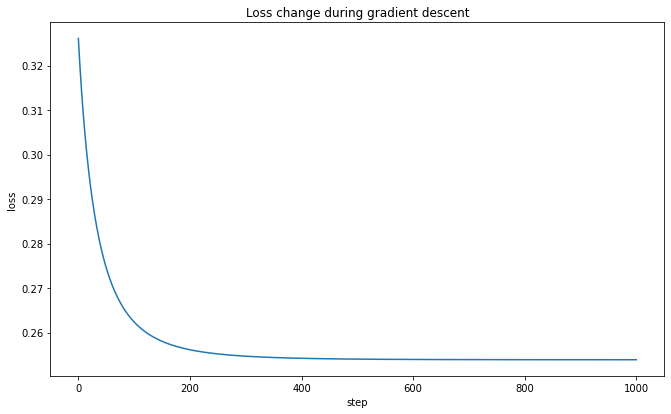

In [ ]:
plt.figure(figsize=(11, 6.5))
plt.plot(loss_array)
plt.title('Loss change during gradient descent')
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

Визуализируем результат.

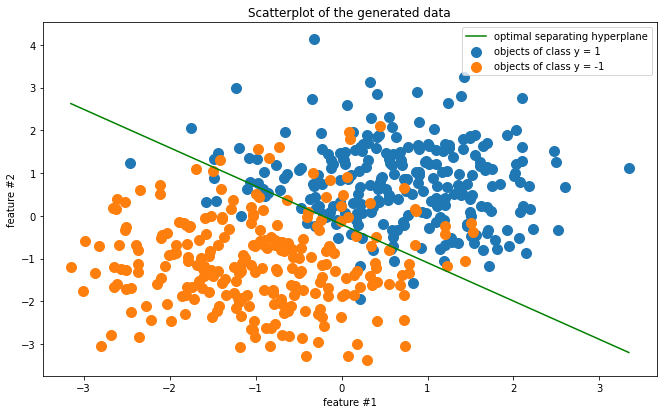

In [ ]:
w0 = w[0]
w1 = w[1]
w2 = w[2]
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
x2 = (- w1 * x1 - w0) / w2

plt.figure(figsize=(11, 6.5))
plt.scatter(X[y == 1, 0], X[y == 1, 1], cmap='winter', s=100, label='objects of class y = 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], cmap='winter', s=100, label='objects of class y = -1')
plt.plot(x1, x2, color='green', label='optimal separating hyperplane')
plt.title('Scatterplot of the generated data')
plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.legend()
plt.show()

В `sklearn` есть готовая реализация линейного классификатора, который можно обучить с помощью градиентного спуска.

In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=1000, learning_rate='constant', eta0=0.1, random_state=13)
# заметьте - в данном случае добавлять единичный признак в датасет не нужно, потому что метод SGDClassifier создаст его сам
clf.fit(X, y)
y_pred_sgdclf = clf.predict(X)

Посмотрим на получившиеся веса при признаках и на свободный коэффициент:

In [ ]:
clf.coef_, clf.intercept_

(array([[1.03540699, 1.62033805]]), array([0.5]))

Визуализируем результат.

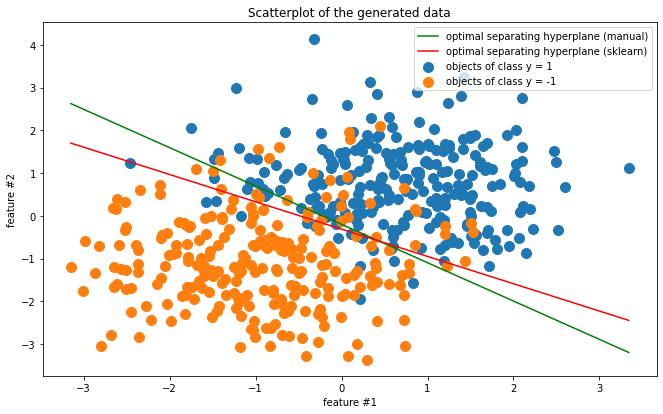

In [ ]:
w0_clf = clf.intercept_.item()
w1_clf = clf.coef_[0][0]
w2_clf = clf.coef_[0][1]
x2_clf = (- w1_clf * x1 - w0_clf) / w2_clf

plt.figure(figsize=(11, 6.5))
plt.scatter(X[y == 1, 0], X[y == 1, 1], cmap='winter', s=100, label='objects of class y = 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], cmap='winter', s=100, label='objects of class y = -1')
plt.plot(x1, x2, color='green', label='optimal separating hyperplane (manual)')
plt.plot(x1, x2_clf, color='red', label='optimal separating hyperplane (sklearn)')
plt.title('Scatterplot of the generated data')
plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.legend()
plt.show()

# Метрики качества классификации

Итак, мы получили оптимальный результат с точки зрения градиентного спуска. Однако на данный момент мы измеряли качество по значению логистической функции потерь (чем меньше, тем лучше), которое не очень понятно, как интерпретировать. Можно ли рассмотреть что-то более интерпретируемое?

In [ ]:
def predict_classes(X, w):
    return np.sign(X @ w)

y_pred = predict_classes(X_new, w)
y_pred[:6], y_pred[-6:]

(array([ 1.,  1.,  1.,  1.,  1., -1.]), array([ 1., -1., -1., -1., -1., -1.]))

### Доля правильных ответов (accuracy)

Доля правильных ответов - пожалуй, одна из самых тривиальных метрик. Она показывает долю верных предсказаний среди всех объектов:

$$
\text{accuracy}(a, X) = \frac{1}{\ell}\sum\limits_{i=1}^\ell [a(x_i) = y_i]
$$

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.904

Итак, алгоритм предсказывает верно 90.4% объектов. Для более детального анализа можно построить матрицу ошибок:

|           | y = 1               | y = -1              |
|-----------|---------------------|---------------------|
| a(x) = 1  | True Positive (TP)  | False Positive (FP) |
| a(x) = -1 | False Negative (FN) | True Negative (TN)  |

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[223,  27],
       [ 21, 229]])

Итак, в данном примере алгоритм неправильно классифицирует 21 объект положительного класса и 27 объектов отрицательного класса.

Проблема метрики accuracy в том, что она не учитывает цену ошибки, и дает обманчивый результат в случае несбалансированной выборки, о чем рассказывалось в лекции. Следующие метрики позволяют акцентировать большее внимание на разные виды ошибок.

### Точность (precision)

Точность показывает долю верно предсказанных положительных объектов среди всех предсказаний положительного класса:

$$
\text{precision}(a, X) = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

In [ ]:
from sklearn.metrics import precision_score
precision_score(y, y_pred)

0.89453125

### Полнота (recall)

Полнота показывает долю верно предсказанных положительных объектов среди всех положительных объектов в данных:

$$
\text{recall}(a, X) = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

In [ ]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.916

Точность и полнота в данном случае показывают похожий результат, потому что модель примерно одинаково ошибается в классификации объектов положительного и отрицательного классов. В реальных задачах можно максимизировать точность или полноту в зависимости от того, какой вид ошибок мы не хотим допускать. Однако обычно при максимизации одной из этих метрик значение другой ухудшается.

### F-мера (F-score)

F-мера - это метрика, находящая некоторый баланс между точностью и полнотой. Ее значение - это их гармоническое среднее:

$$
\text{F-score}(a, X) = 2\frac{\text{precision}(a, X)\cdot\text{recall}(a, X)}{\text{precision}(a, X) + \text{recall}(a, X)}
$$

In [ ]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.9051383399209487

In [ ]:
2 * precision_score(y, y_pred) * recall_score(y, y_pred) / (precision_score(y, y_pred) + recall_score(y, y_pred))

0.9051383399209487

Если какой-либо из метрик (точности или полноте) необходимо отдать приоритет, можно использовать взвешенную версию F-меры - с положительным параметром $\beta$:

$$
\text{F-score}_\beta(a, X) = (1 + \beta^2)\frac{\text{precision}(a, X)\cdot\text{recall}(a, X)}{\beta^2\text{precision}(a, X) + \text{recall}(a, X)}
$$

Если $0 < \beta < 1$, то нам важнее точность. Это легко проверить, устремив $\beta$ к $0$ - в таком случае в выражении выше останется лишь точность. Если $\beta > 1$, то нам важнее полнота - проверяется это аналогичным образом, устремлением $\beta$ к бесконечности.

In [ ]:
from sklearn.metrics import fbeta_score
beta = 0.5
fbeta_score(y, y_pred, beta)

0.8987441130298274

### PR-кривая и AUC-PRC

Вместо того, чтобы предсказывать один из классов в задаче классификации, можно предсказывать вероятность принадлежности одному из классов. А именно, построить алгоритм $b(x)$, который вместо чисел $1$ и $-1$ будет выдавать вещественное число от $0$ до $1$ - вероятность того, что объект принадлежит классу $1$. Скажем, если $b(x) = 0.98$, то можно заключить, что по мнению алгоритма объект $x$ принадлежит классу $1$ с вероятностью $98\%$. Для того, чтобы из предсказаний затем все же получить один из классов $1$ или $-1$, можно задать порог $t$ и использовать алгоритм $a(x) = [b(x) > t]$. Одной из таких моделей является, например, логистическая регрессия. На выходе из нее получается число от $0$ до $1$, и чтобы получить класс в качестве ответа, можно задать порог $t$ равный, к примеру, $0.5$.

In [ ]:
def predict_probabilities(X, w):
    return 1 / (1 + np.exp(-X @ w))

y_pred_prob = predict_probabilities(X_new, w)
y_pred_prob[:6], y_pred_prob[-6:]

(array([0.96129551, 0.9773094 , 0.9980165 , 0.99892936, 0.97127846,
        0.34358065]),
 array([0.6877274 , 0.06982283, 0.01196644, 0.06840172, 0.0027049 ,
        0.00095486]))

In [ ]:
def threshold(y_pred_prob, t):
    y_pred_t = y_pred_prob.copy()
    y_pred_t[y_pred_t > t] = 1
    y_pred_t[y_pred_t <= t] = -1
    return y_pred_t

t = 0.5
y_pred_t = threshold(y_pred_prob, t)
print('t =', t)
print('Precision:', precision_score(y, y_pred_t))
print('Recall:', recall_score(y, y_pred_t))

t = 0.5
Precision: 0.89453125
Recall: 0.916


In [ ]:
t = 0.75
y_pred_t = threshold(y_pred_prob, t)
print('t =', t)
print('Precision:', precision_score(y, y_pred_t))
print('Recall:', recall_score(y, y_pred_t))

t = 0.75
Precision: 0.9142857142857143
Recall: 0.768


In [ ]:
t = 0.25
y_pred_t = threshold(y_pred_prob, t)
print('t =', t)
print('Precision:', precision_score(y, y_pred_t))
print('Recall:', recall_score(y, y_pred_t))

t = 0.25
Precision: 0.8350515463917526
Recall: 0.972


Как выбрать порог? Для ответа на этот вопрос, и в целом для более подробного анализа результатов классификации можно использовать PR-кривую, которая показывает взаимосвязь значения порога $t$ и значений точности и полноты. По оси $x$ отложим полноту, по оси $y$ - точность, и для каждого возможного значения порога (которых столько, сколько различных значений вероятностей для объектов в датасете выдал алгоритм) посчитаем значение точности и полноты и обозначим его на графике.

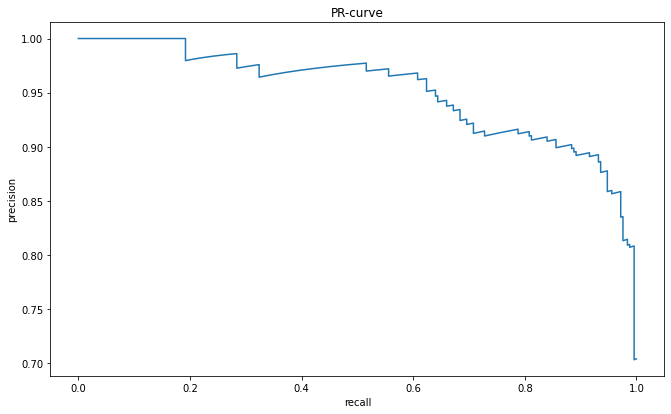

In [ ]:
from sklearn.metrics import precision_recall_curve
precision_array, recall_array, thresholds = precision_recall_curve(y, y_pred_prob)
plt.figure(figsize=(11, 6.5))
plt.plot(recall_array, precision_array)
plt.title('PR-curve')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

Предположим, что нам необходимо получить точность не меньше $0.95$. Какой тогда нужно задать порог, чтобы значение полноты было оптимальным?

In [ ]:
big_precision_idx = np.where(precision_array >= 0.95)
big_precision_idx

(array([187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
        200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
        213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
        226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
        239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
        252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,
        265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277,
        278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290,
        291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303,
        304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316,
        317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329,
        330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342,
        343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355]),)

In [ ]:
recall_array[big_precision_idx]

array([0.64 , 0.636, 0.632, 0.628, 0.624, 0.624, 0.624, 0.62 , 0.616,
       0.612, 0.608, 0.608, 0.604, 0.6  , 0.596, 0.592, 0.588, 0.584,
       0.58 , 0.576, 0.572, 0.568, 0.564, 0.56 , 0.556, 0.556, 0.552,
       0.548, 0.544, 0.54 , 0.536, 0.532, 0.528, 0.524, 0.52 , 0.516,
       0.516, 0.512, 0.508, 0.504, 0.5  , 0.496, 0.492, 0.488, 0.484,
       0.48 , 0.476, 0.472, 0.468, 0.464, 0.46 , 0.456, 0.452, 0.448,
       0.444, 0.44 , 0.436, 0.432, 0.428, 0.424, 0.42 , 0.416, 0.412,
       0.408, 0.404, 0.4  , 0.396, 0.392, 0.388, 0.384, 0.38 , 0.376,
       0.372, 0.368, 0.364, 0.36 , 0.356, 0.352, 0.348, 0.344, 0.34 ,
       0.336, 0.332, 0.328, 0.324, 0.324, 0.32 , 0.316, 0.312, 0.308,
       0.304, 0.3  , 0.296, 0.292, 0.288, 0.284, 0.284, 0.28 , 0.276,
       0.272, 0.268, 0.264, 0.26 , 0.256, 0.252, 0.248, 0.244, 0.24 ,
       0.236, 0.232, 0.228, 0.224, 0.22 , 0.216, 0.212, 0.208, 0.204,
       0.2  , 0.196, 0.192, 0.192, 0.188, 0.184, 0.18 , 0.176, 0.172,
       0.168, 0.164,

In [ ]:
t = thresholds[186]
y_pred_t = threshold(y_pred_prob, t)
print('t =', t)
print('Precision:', precision_score(y, y_pred_t))
print('Recall:', recall_score(y, y_pred_t))

t = 0.8871769969570549
Precision: 0.9523809523809523
Recall: 0.64


In [ ]:
f1_score(y, y_pred_t)

0.7655502392344498

Площадь под PR-кривой (AUC-PRC) показывает, насколько хорошо классификатор отранжировал объекты.

In [ ]:
from sklearn.metrics import auc
auc(recall_array, precision_array)

0.9512406526621621

### ROC-кривая и AUC-ROC

Проанализировать результаты классификации (насколько хорошо алгоритм отранжировал объекты, присвоив им вероятности) также можно с помощью ROC-кривой. Принцип ее построения такой же, как и в PR-кривой - меняя значение порога, считать значения по осям. Только в этом случае по оси $x$ отложен False Positive Rate, по оси $y$ - True Positive Rate (который имеет ту же формулу, что и полнота):

$$
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
$$

$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

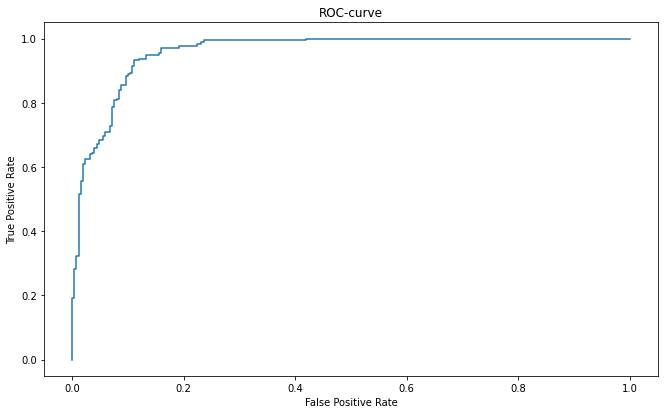

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
plt.figure(figsize=(11, 6.5))
plt.plot(fpr, tpr)
plt.title('ROC-curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Площадь под ROC-кривой показывает вероятность того, что случайно выбранная пара объектов, где один из них относится к положительному классу, а другой - к отрицательному, окажется отранжированной правильно с точки зрения вероятностей (алгоритм выдаст бОльшую вероятность в случае объекта положительного класса).

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_pred_prob)

0.959056

Как и доля правильных ответов, метрика AUC-ROC может ввести в заблуждение в случае задачи с несбалансированными классами.